In [418]:
# Import our dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [419]:
# Import our input dataset
weather_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/weather.csv', encoding='latin-1')
price_demand_df_original = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/energy_consumption_vs_weather_data/main/Resources/price_and_demand.csv', encoding='latin-1')

In [420]:
# Checking any missing values per column and per rows
def data_checking(weather):
    # Identify NaN or empty values
    missing_values = weather.isna().sum()

    # Identify incorrect value types
    incorrect_types = weather.apply(lambda x: pd.to_numeric(x, errors='coerce').isna().sum())

    # Combine the results into a DataFrame
    cleaning_report = pd.DataFrame({'Missing Values': missing_values, 'Incorrect Types': incorrect_types})

    return cleaning_report

### Processing Weather file

In [421]:
data_checking (weather_df_original)

,Missing Values,Incorrect Types
Location,0,175
Date,0,175
Minimum temperature (°C),0,0
Maximum temperature (°C),1,1
Rainfall (mm),0,0
Evaporation (mm),175,175
Sunshine (hours),175,175
Direction of maximum wind gust,1,175
Speed of maximum wind gust (km/h),1,1
Time of maximum wind gust,1,175


In [422]:
# Create a copy of the original dataframe to avoid modifying it
weather_df = weather_df_original.copy(deep=True)
price_demand_df = price_demand_df_original.copy(deep=True)

In [423]:
# Drop off all empty columns
weather_df = weather_df.dropna(axis=1, how='all')
weather_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,SW,44.0,11:36:00,12.0,64,NW,13,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,SSW,43.0,11:33:00,11.0,65,W,9,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,SSW,31.0,8:07:00,11.5,70,SSW,9,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,S,24.0,14:50:00,12.3,84,WSW,6,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,N,31.0,11:58:00,14.0,78,N,9,1026.3,18.8,65.0,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,SSW,17.0,12:47:00,12.4,72,NNE,7,1026.8,17.5,58.0,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,SSW,13.0,10:48:00,14.8,78,NE,6,1030.5,18.6,64.0,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,SSW,22.0,16:09:00,15.2,84,SW,6,1031.9,18.8,64.0,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,SSW,26.0,15:45:00,16.7,79,SSE,7,1034.4,17.8,71.0,SSW,13.0,1032.4


In [424]:
# Convert the Date column to datetime64
weather_df['Date'] = pd.to_datetime(weather_df['Date'], dayfirst=True)

In [425]:
# check the data types
weather_df.dtypes

Location                                     object
Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Direction of maximum wind gust               object
Speed of maximum wind gust (km/h)           float64
Time of maximum wind gust                    object
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind direction                           object
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind direction                           object
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object

In [426]:
# Drop off all rows that have more than 4 missing values
weather_df = weather_df.dropna(thresh=len(weather_df.columns)-4)

In [427]:
# Set the Time of maximum wind gust column to numeric:
weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_53242/1344425496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Time of maximum wind gust'] = pd.to_timedelta(weather_df['Time of maximum wind gust'].apply(lambda x: x.zfill(5)))


In [428]:
# Replace 'calm' with 0
weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)

# Convert the 9am wind speed column to numeric:
weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_53242/1016144277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = weather_df['9am wind speed (km/h)'].replace('Calm', 0.0, inplace=False)
/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_53242/1016144277.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['9am wind speed (km/h)'] = pd.to_numeric(weather_df['9am wind speed (km/h)'])


In [429]:
weather_df.head()

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2


In [430]:
data_checking (weather_df)

,Missing Values,Incorrect Types
Location,0,174
Date,0,0
Minimum temperature (°C),0,0
Maximum temperature (°C),0,0
Rainfall (mm),0,0
Direction of maximum wind gust,0,174
Speed of maximum wind gust (km/h),0,0
Time of maximum wind gust,0,0
9am Temperature (°C),0,0
9am relative humidity (%),0,0


### Processing Price and Demand file

In [431]:
data_checking (price_demand_df)

,Missing Values,Incorrect Types
VIC1,0,8351
1/11/2022 0:30,0,8351
4178.18,0,0
8.94,0,0
TRADE,0,8351


In [432]:
# Checking data type and shape of dataframe
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIC1            8351 non-null   object 
 1   1/11/2022 0:30  8351 non-null   object 
 2   4178.18         8351 non-null   float64
 3   8.94            8351 non-null   float64
 4   TRADE           8351 non-null   object 
dtypes: float64(2), object(3)
memory usage: 326.3+ KB


In [433]:
# Adding headers for price_demand_df:
header = ["State", "Date_Time", "Demand", "Price", "Trading_Status"]
price_demand_df.columns = header
price_demand_df

,State,Date_Time,Demand,Price,Trading_Status
0,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
1,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
2,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
3,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
4,VIC1,1/11/2022 3:00,3919.59,1.04,TRADE
...,...,...,...,...,...
8346,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8347,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8348,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8349,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [434]:
# Convert the Date_Time column from object type to datetime type
price_demand_df['Date_Time'] = pd.to_datetime(price_demand_df['Date_Time'], dayfirst=True)

In [435]:
# Drop off any irrelevant columns
price_demand_df = price_demand_df[['Date_Time', 'Demand', 'Price']]
price_demand_df.head()

,Date_Time,Demand,Price
0,2022-11-01 01:00:00,4086.02,0.14
1,2022-11-01 01:30:00,4033.37,0.02
2,2022-11-01 02:00:00,3985.64,0.00
3,2022-11-01 02:30:00,3885.64,0.02
4,2022-11-01 03:00:00,3919.59,1.04


In [436]:
# rechecking the dataframe information and type
price_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8351 entries, 0 to 8350
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  8351 non-null   datetime64[ns]
 1   Demand     8351 non-null   float64       
 2   Price      8351 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 195.9 KB


In [437]:
# Split the Date_Time column into separate Date and Time columns
price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)
price_demand_df['Time'] = pd.to_datetime(price_demand_df['Date_Time'].dt.strftime('%H:%M:%S')).dt.time

# Rearrange all the columns, remove the Time column because it is redundant
price_demand = price_demand_df[['Date', 'Demand', 'Price']]

#the total daily demand
price_demand = price_demand.groupby(['Date']).sum().reset_index()
price_demand.head()

/var/folders/1q/m_w3rzf53dsffnjskzdfh89m0000gn/T/ipykernel_53242/324069680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_demand_df['Date'] = pd.to_datetime(((price_demand_df['Date_Time']).dt.date), dayfirst=True)


,Date,Demand,Price
0,2022-11-01,203251.28,-185.78
1,2022-11-02,233630.93,-120.73
2,2022-11-03,235672.34,3034.04
3,2022-11-04,224895.28,5325.08
4,2022-11-05,189190.35,3502.20


In [438]:
# Joining two datasets: energy consumption and weather
daily_weather_energy_df = pd.merge(weather_df, price_demand, on='Date', how='inner')
daily_weather_energy_df

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Demand,Price
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,203251.28,-185.78
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93,-120.73
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34,3034.04
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28,5325.08
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35,3502.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,"Melbourne (Olympic Park), Victoria",2023-04-19,14.4,17.5,1.2,SW,28.0,0 days 11:32:00,14.8,66,WSW,9.0,1022.0,15.8,53.0,SSW,9.0,1022.1,220897.61,4912.03
170,"Melbourne (Olympic Park), Victoria",2023-04-20,7.8,18.5,0.0,SSW,17.0,0 days 12:47:00,12.4,72,NNE,7.0,1026.8,17.5,58.0,SW,4.0,1025.5,227925.10,6273.96
171,"Melbourne (Olympic Park), Victoria",2023-04-21,11.3,19.0,0.0,SSW,13.0,0 days 10:48:00,14.8,78,NE,6.0,1030.5,18.6,64.0,SSE,2.0,1029.2,232043.13,6310.13
172,"Melbourne (Olympic Park), Victoria",2023-04-22,14.6,19.2,0.0,SSW,22.0,0 days 16:09:00,15.2,84,SW,6.0,1031.9,18.8,64.0,SSW,11.0,1029.7,207431.82,3858.79


In [439]:
#Drop off the location of the dataset as all the data is from the same location
#Drop off Price as it's not independent, it's dependent on Demand
daily_weather_energy_df = daily_weather_energy_df.drop(['Location', 'Price'], axis=1)

# Drop any rows with missing values (if needed) 
daily_weather_energy_df = daily_weather_energy_df.dropna()
daily_weather_energy_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,SW,44.0,0 days 11:36:00,12.0,64,NW,13.0,991.3,13.2,59.0,WNW,11.0,991.5,203251.28
1,2022-11-02,6.9,15.7,2.8,SSW,43.0,0 days 11:33:00,11.0,65,W,9.0,1006.7,15.1,54.0,SSW,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,SSW,31.0,0 days 08:07:00,11.5,70,SSW,9.0,1019.2,13.8,67.0,SSW,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,S,24.0,0 days 14:50:00,12.3,84,WSW,6.0,1028.1,16.9,56.0,SW,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,N,31.0,0 days 11:58:00,14.0,78,N,9.0,1026.3,18.8,65.0,SW,11.0,1023.2,189190.35


In [440]:
#Change the wind directions to compass degrees so the data becomes numeric

directions_dict={'N':0, 'NNE':22.5,"NE":45,"ENE":67.5, 'E':90,'ESE':112.5, 'SE':135,'SSE':157.5, 'S':180,'SSW':202.5, 'SW':225,'WSW':247.5, 'W':270,'WNW':292.5,'NW':315,'NNW':337.5}
daily_weather_energy_df=daily_weather_energy_df.replace({"Direction of maximum wind gust ": directions_dict,'9am wind direction': directions_dict, '3pm wind direction':directions_dict})

#Add compass degrees to headers where needed
daily_weather_energy_df.rename(columns={'Direction of maximum wind gust ': 'Direction of maximum wind gust (compass °)', '9am wind direction': '9am wind direction (compass °)', '3pm wind direction': '3pm wind direction (compass °)'}, inplace=True)

daily_weather_energy_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Direction of maximum wind gust (compass °),Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am wind direction (compass °),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind direction (compass °),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand
0,2022-11-01,8.5,13.3,3.0,225.0,44.0,0 days 11:36:00,12.0,64,315,13.0,991.3,13.2,59.0,292.5,11.0,991.5,203251.28
1,2022-11-02,6.9,15.7,2.8,202.5,43.0,0 days 11:33:00,11.0,65,270,9.0,1006.7,15.1,54.0,202.5,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,202.5,31.0,0 days 08:07:00,11.5,70,202.5,9.0,1019.2,13.8,67.0,202.5,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,180.0,24.0,0 days 14:50:00,12.3,84,247.5,6.0,1028.1,16.9,56.0,225.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,0.0,31.0,0 days 11:58:00,14.0,78,0,9.0,1026.3,18.8,65.0,225.0,11.0,1023.2,189190.35


In [441]:
#Change data type of "Time of maximum wind gust" to to use in correlation plots
daily_weather_energy_df['Time of maximum wind gust'] = daily_weather_energy_df['Time of maximum wind gust'] / pd.Timedelta(minutes=1)

# Checkin the data types of the columns
daily_weather_energy_df.dtypes

#think there is a problem with blank " " string data values in 9am wind direction column***

Date                                          datetime64[ns]
Minimum temperature (°C)                             float64
Maximum temperature (°C)                             float64
Rainfall (mm)                                        float64
Direction of maximum wind gust (compass °)           float64
Speed of maximum wind gust (km/h)                    float64
Time of maximum wind gust                            float64
9am Temperature (°C)                                 float64
9am relative humidity (%)                              int64
9am wind direction (compass °)                        object
9am wind speed (km/h)                                float64
9am MSL pressure (hPa)                               float64
3pm Temperature (°C)                                 float64
3pm relative humidity (%)                            float64
3pm wind direction (compass °)                       float64
3pm wind speed (km/h)                                float64
3pm MSL pressure (hPa)  

### *Checking correlation*


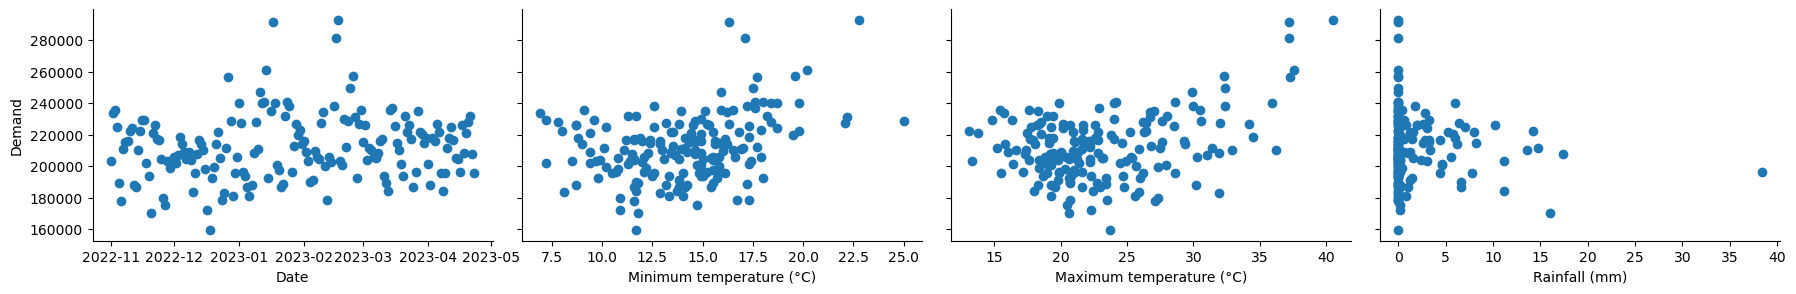

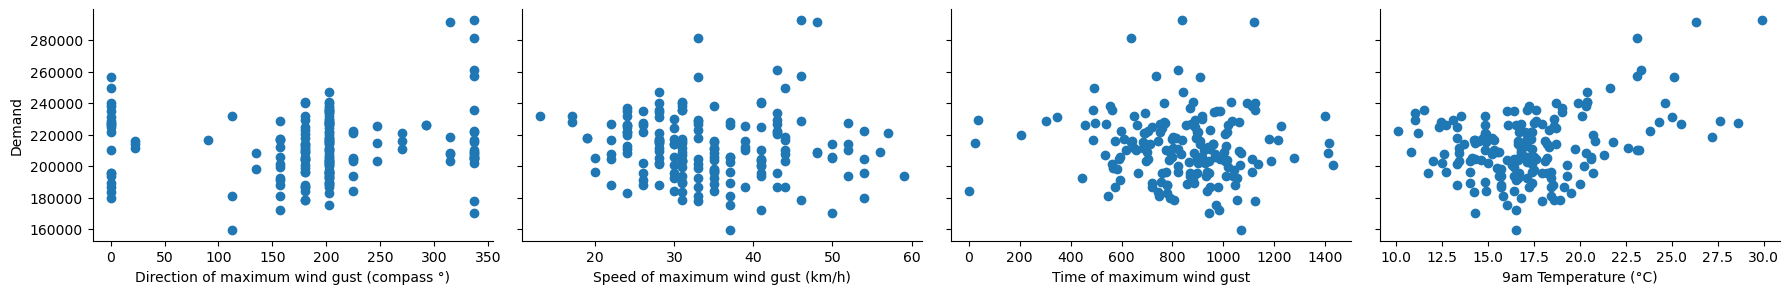

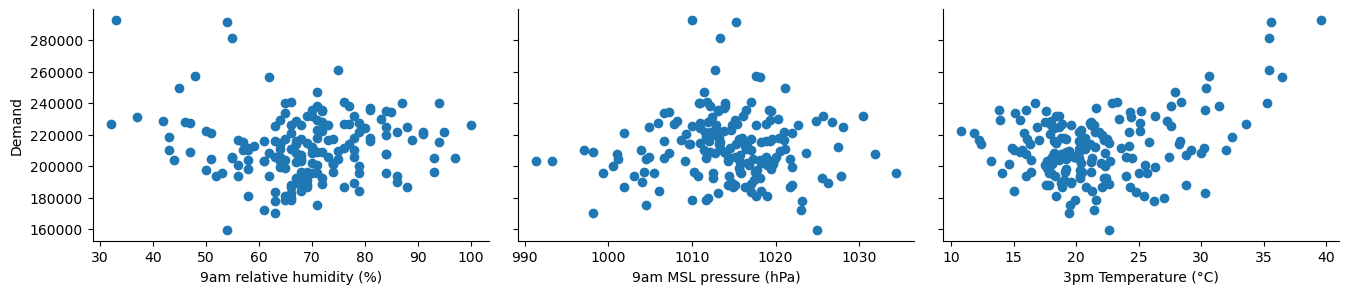

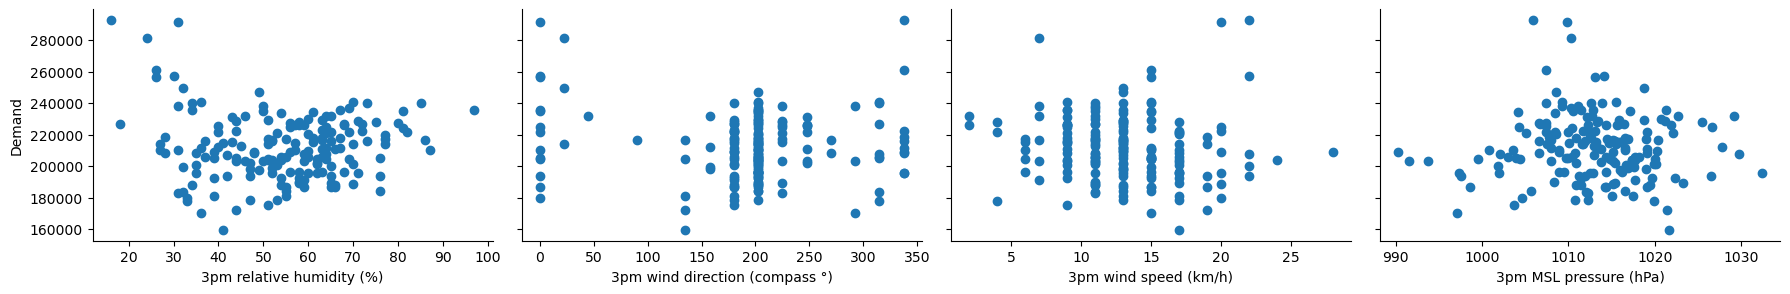

In [442]:
# Correlation scatter plots with Demand as the y variable 

sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=['Date', 'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)'],).map(plt.scatter)
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=['Direction of maximum wind gust (compass °)', 'Speed of maximum wind gust (km/h)', 'Time of maximum wind gust', '9am Temperature (°C)']).map(plt.scatter)
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=['9am relative humidity (%)', '9am MSL pressure (hPa)', '3pm Temperature (°C)']).map(plt.scatter)
#needs to be added in when data fixed:'9am wind direction (compass °)
sns.PairGrid(daily_weather_energy_df, height=3, aspect=1.5, y_vars='Demand', x_vars=['3pm relative humidity (%)', '3pm wind direction (compass °)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']).map(plt.scatter)


[0.13435335 0.20528804 0.01890995 0.02806269 0.04859623 0.04286712
 0.06553028 0.05330715 0.03448253 0.04597993 0.1830209  0.05336318
 0.01898588 0.03317414 0.03407863]


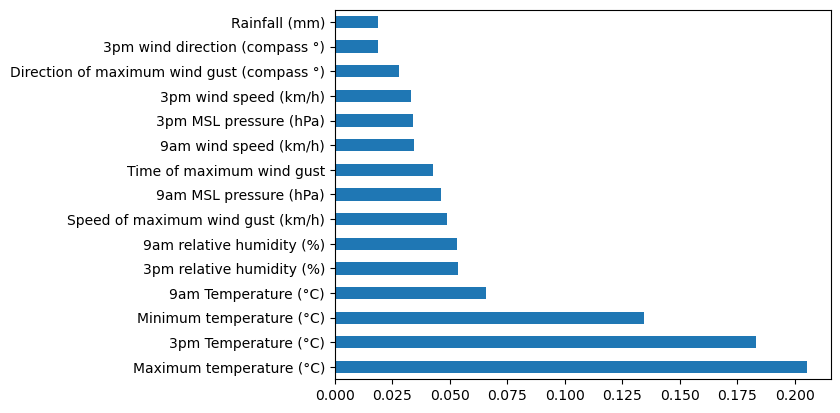

In [444]:
# Split our preprocessed data into our features and target arrays
y_bargraph = daily_weather_energy_df["Demand"]

#Drop the Date column due to data type for next comparison, and cannot see obvious pattern in its correlation plot 
#temporarily drop wind direction, gives error until wind column fixed...
X_bargraph = daily_weather_energy_df.drop(["Demand", "Date", "9am wind direction (compass °)"], axis=1)

# Checking which feature is important to the target:
important_feature = RandomForestRegressor(random_state=42)
important_feature.fit(X_bargraph,y_bargraph)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X_bargraph.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


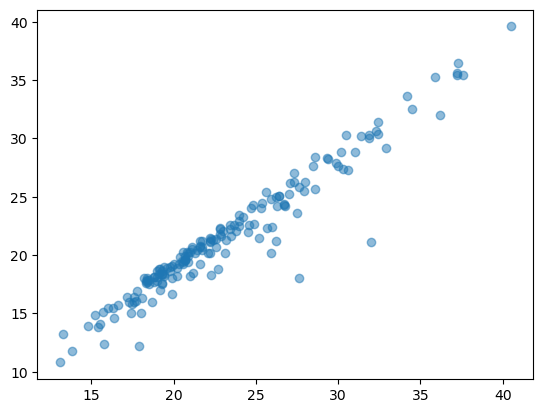

In [445]:
#will not use multiple temperature measures together as they would not be independent from each other (for multiple regression)
plt.scatter(x=daily_weather_energy_df['Maximum temperature (°C)'], y=daily_weather_energy_df['3pm Temperature (°C)'], alpha=0.5)

plt.show()

#very obviously not independent

In [446]:
# Calculate the Pearson's R correlation metric for Max temp, shows a moderate positive correlation
daily_weather_energy_df[['Maximum temperature (°C)', 'Demand']].corr(method='pearson')


,Maximum temperature (°C),Demand
Maximum temperature (°C),1.00000,0.36948
Demand,0.36948,1.00000


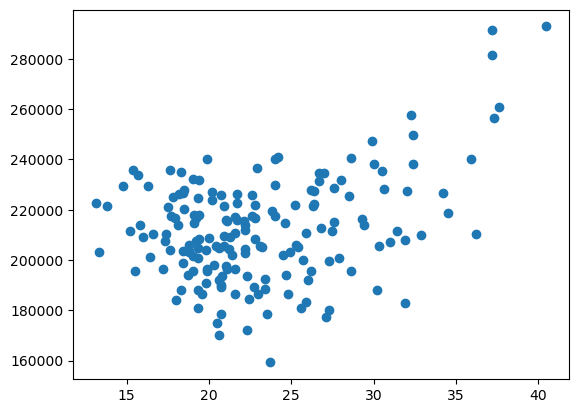

In [447]:
#Correlation of Max temp and Demand
plt.scatter(x=daily_weather_energy_df['Maximum temperature (°C)'], y=daily_weather_energy_df['Demand'])

plt.show()


In [448]:
#Calculate the Pearson's R correlation metric for 3pm humidity, next highest non-temperature variable 
#shows trivial correlation

daily_weather_energy_df[['Demand', '3pm relative humidity (%)']].corr(method='pearson')


,Demand,3pm relative humidity (%)
Demand,1.00000,-0.06569
3pm relative humidity (%),-0.06569,1.00000


### *Which Model will be used*
We use Regresssion Model because our target value is maximum daily energy usage and it is a continuous (numerical) value

In [449]:
#Assigning chosen variable for simple linear regression
X = daily_weather_energy_df[['Maximum temperature (°C)']]
y = daily_weather_energy_df['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [450]:
# Preprocessing

# Scaling
# Fit the StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)

# Create a MinMaxScaler object
scaler_mm = MinMaxScaler().fit(X_train)

X_train_mm = scaler_mm.transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

# Imputing should be done earlier?
#imputer = impute.SimpleImputer().fit(X_train)
#X_train=imputer.transform(X_train)
#X_test=imputer.transform(X_test)

# Instantiate
lm = linear_model.LinearRegression()
# Fit
lm.fit(X_train_ss, y_train)
# Predict
y_pred = lm.predict(X_test_ss)

In [451]:
print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_pred[0:5])
print('')

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[215324.69455018 208678.80821526 217190.20650384 209261.78070078
 203082.27235428]



In [452]:
# Evaluate
#Describe what these are telling us 

print("R2 score:", r2_score(y_test, y_pred))
print("RMSE score:", mean_squared_error(y_test, y_pred, squared=False))

R2 score: 0.19048391831215272
RMSE score: 23569.816405982976


In [453]:
#Minmax scaler version...

# Fit
lm.fit(X_train_mm, y_train)
# Predict
y_pred_mm = lm.predict(X_test_mm)

# Testing model with MinMaxScaler

print('actual MEDV values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted MEDV values of the first 5 test data:')
print(y_pred_mm[0:5])
print('')

actual MEDV values of the first 5 test data:
39     183406.37
10     224000.36
55     211616.90
103    178602.78
2      235672.34
Name: Demand, dtype: float64

predicted MEDV values of the first 5 test data:
[215324.69455018 208678.80821526 217190.20650384 209261.78070078
 203082.27235428]



In [454]:
# Evaluate
#Describe what these are telling us 

print("R2 score:", r2_score(y_test, y_pred_mm))
print("RMSE score:", mean_squared_error(y_test, y_pred_mm, squared=False))

R2 score: 0.19048391831215272
RMSE score: 23569.816405982976


Model: LinearRegression
Train MSE: 332124190.26
Train MAE: 14575.44
Train R2: 0.10

Test MSE: 555536245.41
Test MAE: 18855.16
Test R2: 0.19

Train score: 0.10456329385471985
Test Score: 0.19048391831215272

***************************************



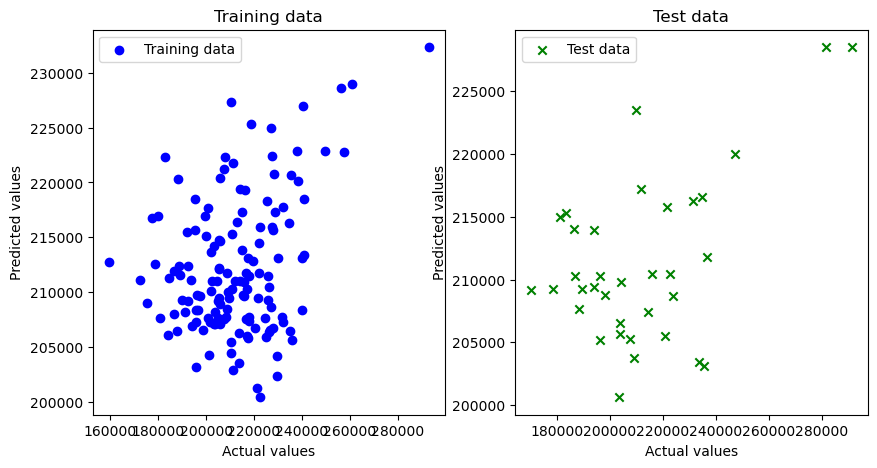

In [455]:
#tried to adjust the scale of the plot for better visualization?

# Create a function to test the model:
def test_model(model, data):
    X_train, X_test, y_train, y_test = data
    reg = model.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
    plt.title('Training data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    #plt.plot([0, 50], [0, 50], c='red')
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, c='green', marker='x', label='Test data')
    plt.title('Test data')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.legend(loc='upper left')
    #plt.plot([0, 50], [0, 50], c='red')

    print(f'Model: {type(reg).__name__}')
    print(f'Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}')
    print(f'Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}')
    print(f'Train R2: {r2_score(y_train, y_train_pred):.2f}\n')

    print(f'Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
    print(f'Test MAE: {mean_absolute_error(y_test, y_test_pred):.2f}')
    print(f'Test R2: {r2_score(y_test, y_test_pred):.2f}\n')

    print(f'Train score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}\n')
    print(f'***************************************\n')
    
#Plot our linear regression model test vs train data
data = [X_train_ss, X_test_ss, y_train, y_test]
test_model(lm, data)


### *Residual Analysis*
examine for: linearity, independence, equal variance


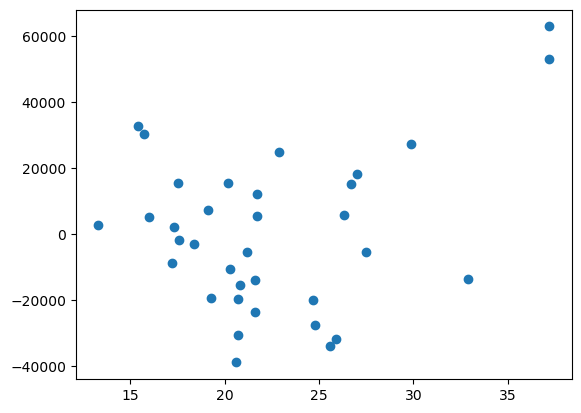

In [456]:
#plotting residuals of our test data set

residuals= y_test - y_pred
plt.scatter(X_test, residuals)
plt.show()

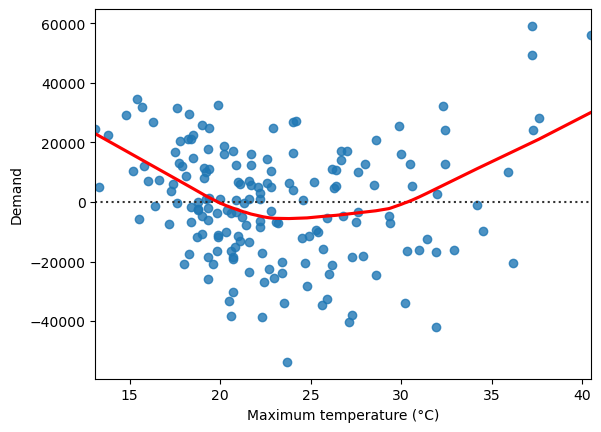

In [457]:
#using sns to better visualise residuals with fit line 
sns.residplot(x=X, y=y, lowess=True, line_kws=dict(color="r"))
   
plt.show()

#### Model Deploy

In [356]:
# Saving the model:
model.save("Max_daily_energy_usage.h5")

NameError: name 'model' is not defined

#### Research-- other methods

Model: KNeighborsRegressor
Train MSE: 200488224.42
Train MAE: 11279.59
Train R2: 0.46

Test MSE: 465782469.41
Test MAE: 17866.87
Test R2: 0.32

Train score: 0.4594657042223995
Test Score: 0.3212712893687306

***************************************

Model: RandomForestRegressor
Train MSE: 93504868.43
Train MAE: 7507.38
Train R2: 0.75

Test MSE: 482863317.69
Test MAE: 18472.44
Test R2: 0.30

Train score: 0.74790245984603
Test Score: 0.29638142577145543

***************************************

Model: GradientBoostingRegressor
Train MSE: 103030035.26
Train MAE: 7866.69
Train R2: 0.72

Test MSE: 448089828.59
Test MAE: 17935.70
Test R2: 0.35

Train score: 0.7222217528527453
Test Score: 0.3470526445800456

***************************************

Model: AdaBoostRegressor
Train MSE: 238347201.98
Train MAE: 12548.59
Train R2: 0.36

Test MSE: 395445802.89
Test MAE: 17178.65
Test R2: 0.42

Train score: 0.3573944936475586
Test Score: 0.4237644446766752

***************************************

Mo

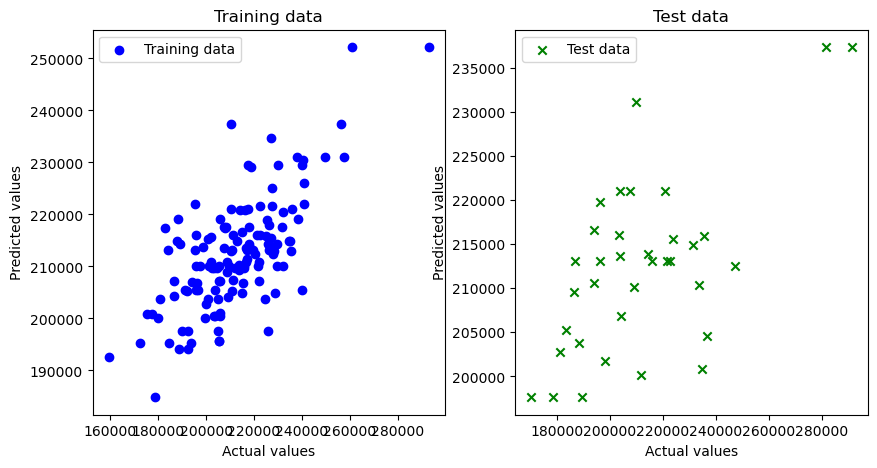

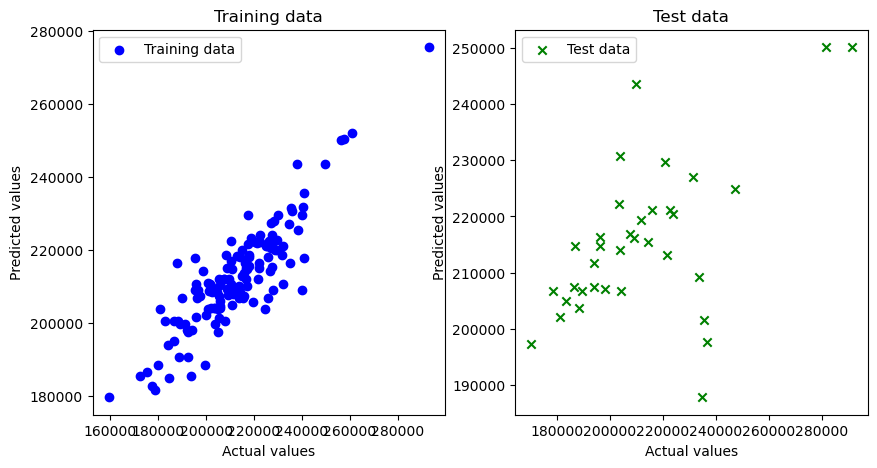

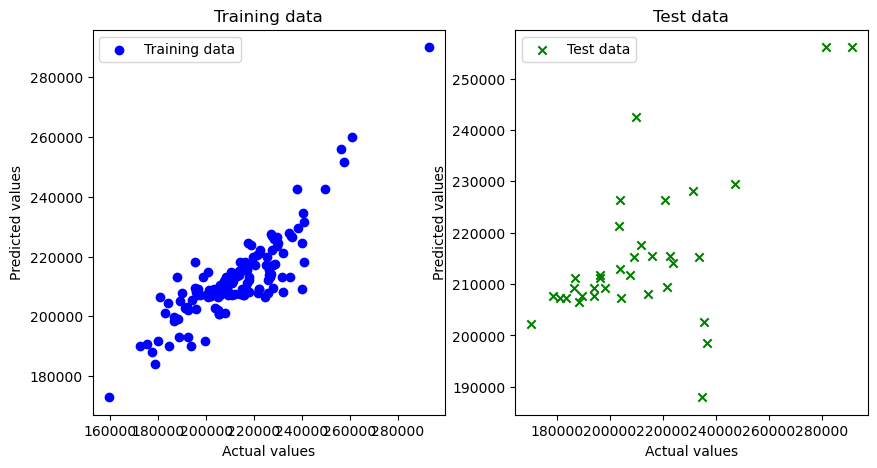

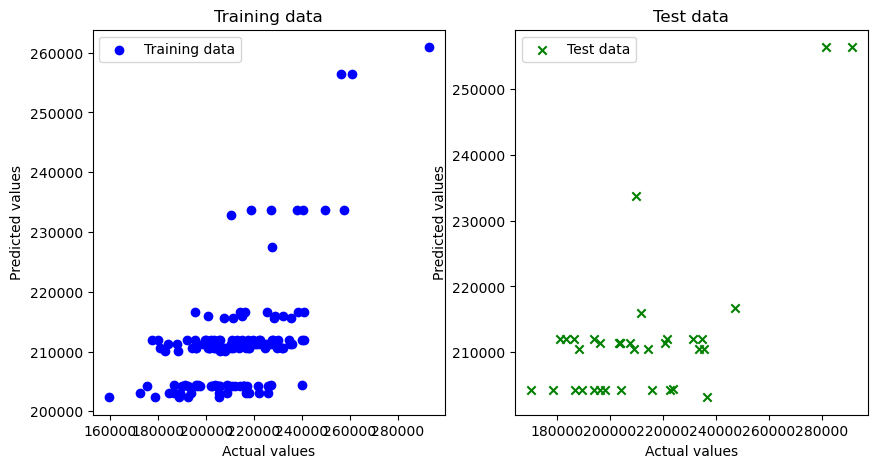

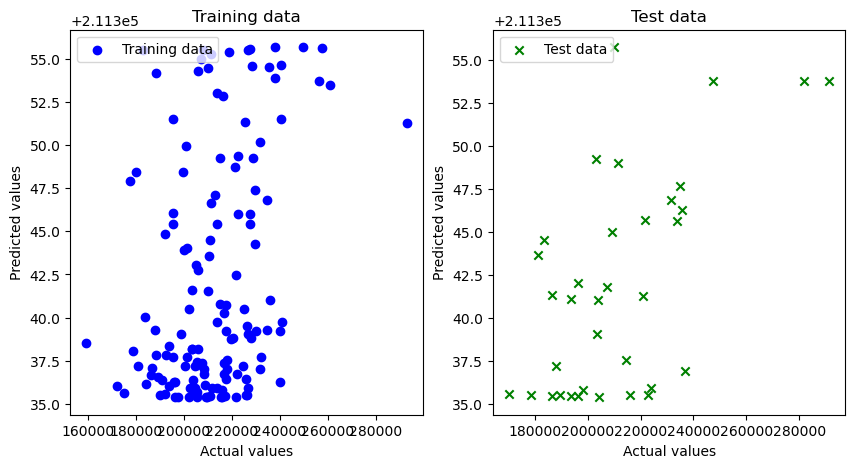

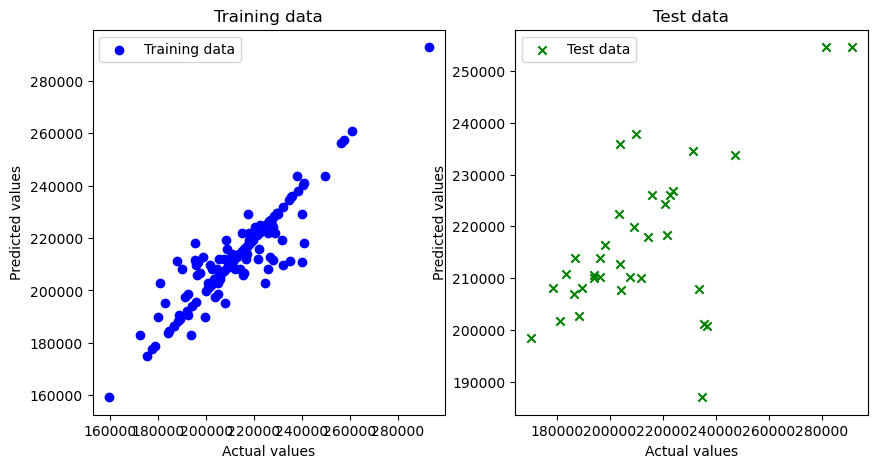

In [458]:
# Testing different models
#should only use these for "research" portion

data = [X_train_ss, X_test_ss, y_train, y_test]

#test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(GradientBoostingRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)
test_model(ExtraTreesRegressor(), data)